In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from DS_models_stat import cut_cat, make_histogram
from DS_data_transformation import inter_cats
%config InlineBackend.figure_format = 'retina'

In [3]:
def hist_prm(df, prm, bins):
    hist, bins = np.histogram(df[prm], bins)
    return hist

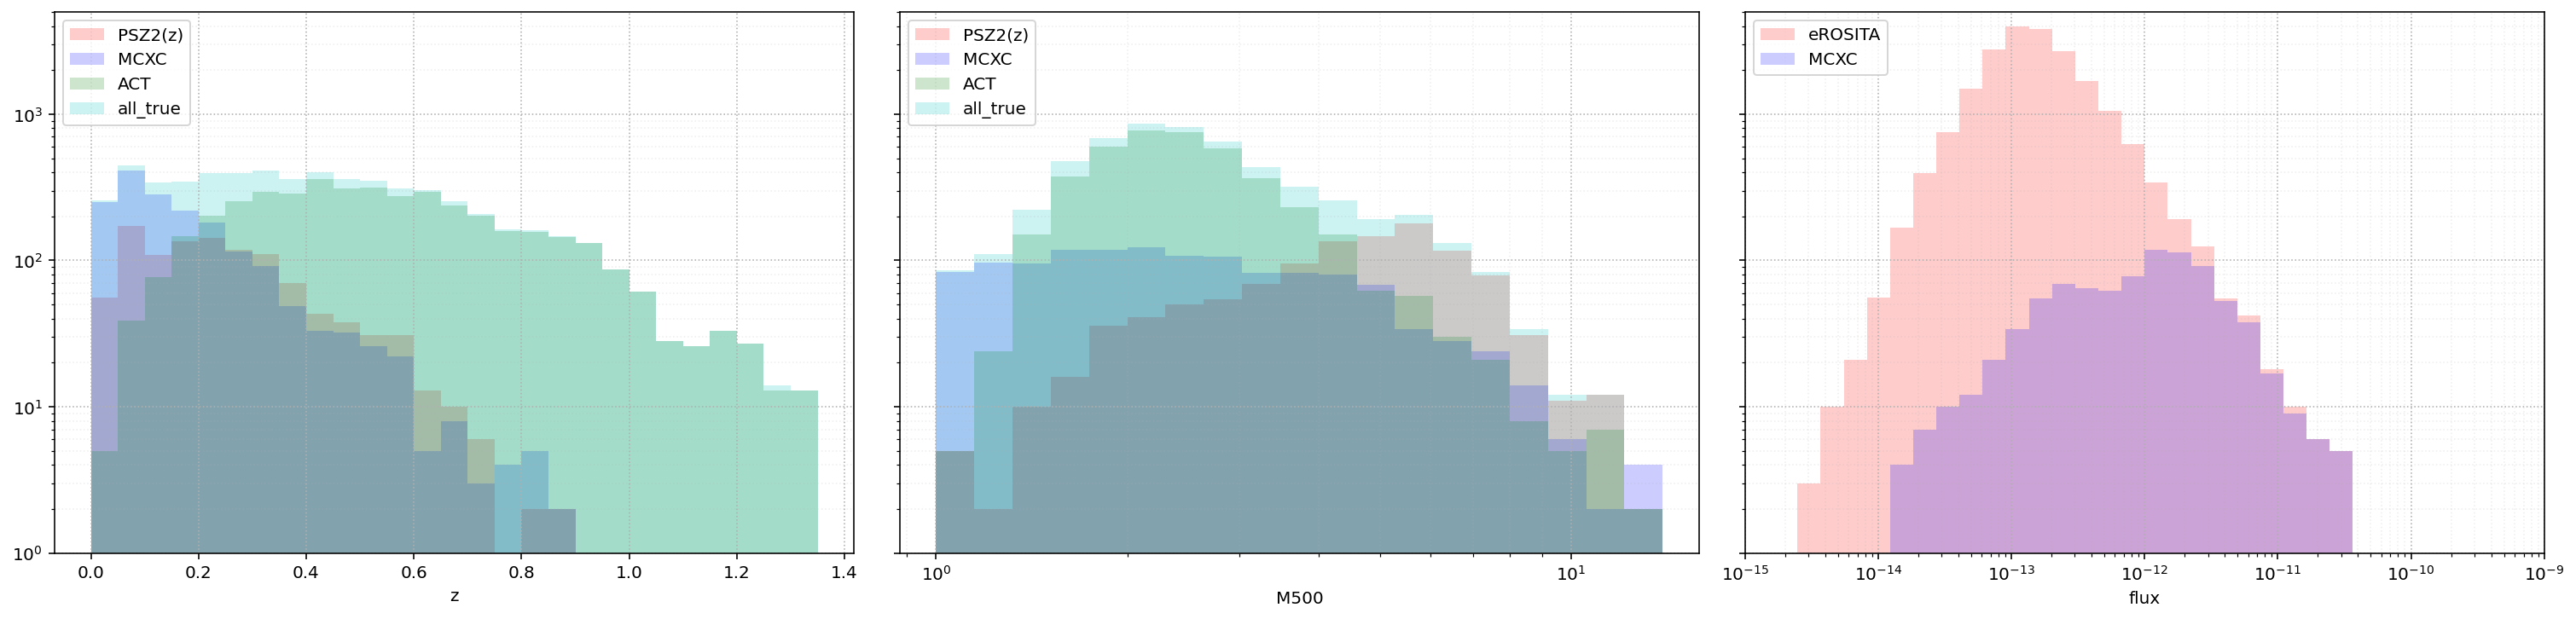

In [62]:
def make_m_z_hist(df_inter=None, add_text='', ylim=[1, 1000 * 5]):
    
    true_cats = {'PSZ2(z)' : pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv'),
             'MCXC' : pd.read_csv('/home/rt2122/Data/original_catalogs/csv/MCXC.csv'),
             'ACT' : pd.read_csv('/home/rt2122/Data/original_catalogs/csv/ACT.csv'),
              'all_true' : pd.read_csv('/home/rt2122/Data/original_catalogs/csv/other/PSZ2(z)_MCXC_ACT_united.csv')}
    eROSITA = pd.read_csv('/home/rt2122/Data/SRGz/clusters/clusters1_b20_edit.csv')
    prm = 'flux'
    mine, maxe = eROSITA[prm].min(), eROSITA[prm].max()
    bins_e = [np.e ** i for i in np.arange(np.log(mine), np.log(maxe), 0.4)]
    mcxc_inter = true_cats['MCXC'].copy()
    mcxc_inter = inter_cats(eROSITA.copy(), mcxc_inter)
    
    if not (df_inter is None):
        for name in true_cats:
            true_cats[name] = inter_cats(true_cats[name], df_inter)
        eROSITA = inter_cats(eROSITA, df_inter)
        mcxc_inter = inter_cats(mcxc_inter, df_inter)
    
    bins_z = np.arange(0, 1.4, 0.05)
    hist_z = {}
    for name in true_cats:
        hist_z[name] = hist_prm(true_cats[name], 'z', bins_z)

    bins_m = [2 ** i for i in np.arange(0, 4, 0.2)]
    hist_m = {}
    for name in true_cats:
        hist_m[name] = hist_prm(true_cats[name], 'M500', bins_m)

    histe = hist_prm(eROSITA, prm, bins_e)
    
    histm = hist_prm(mcxc_inter, prm, bins_e)

    fig, ax = plt.subplots(1, 3, figsize=(7 * 3, 5), sharey=True)
    fig.tight_layout()
    histtype='bar'
    alpha=0.2
    make_histogram(ax[0], counts_list=list(hist_z.values()), bins=bins_z, label_list=[name + add_text for name in list(hist_z.keys())], 
                   log=True, histtype=histtype, alpha=alpha)
    make_histogram(ax[1], counts_list=list(hist_m.values()), bins=bins_m, label_list=[name + add_text for name in list(hist_m.keys())], 
                   log=True, histtype=histtype, alpha=alpha)
    make_histogram(ax[2], counts_list=[histe, histm], bins=bins_e, label_list=['eROSITA' + add_text, 'MCXC' + add_text], 
                   log=True, histtype=histtype,
                  alpha=alpha)
    ax[0].set_xlabel('z')
    ax[1].set_xlabel('M500')
    ax[2].set_xlabel('flux')
    ax[1].set_xscale('log')
    ax[2].set_xscale('log')
    ax[0].set_ylim(ylim)
    ax[2].set_xlim(10**-15, 10**-9)
    for i in range(3):
        ax[i].grid(True, axis='both', which='major', linestyle=':')
        ax[i].grid(True, axis='both', which='minor', alpha=0.2, linestyle=':')
make_m_z_hist()

In [63]:
df = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv')

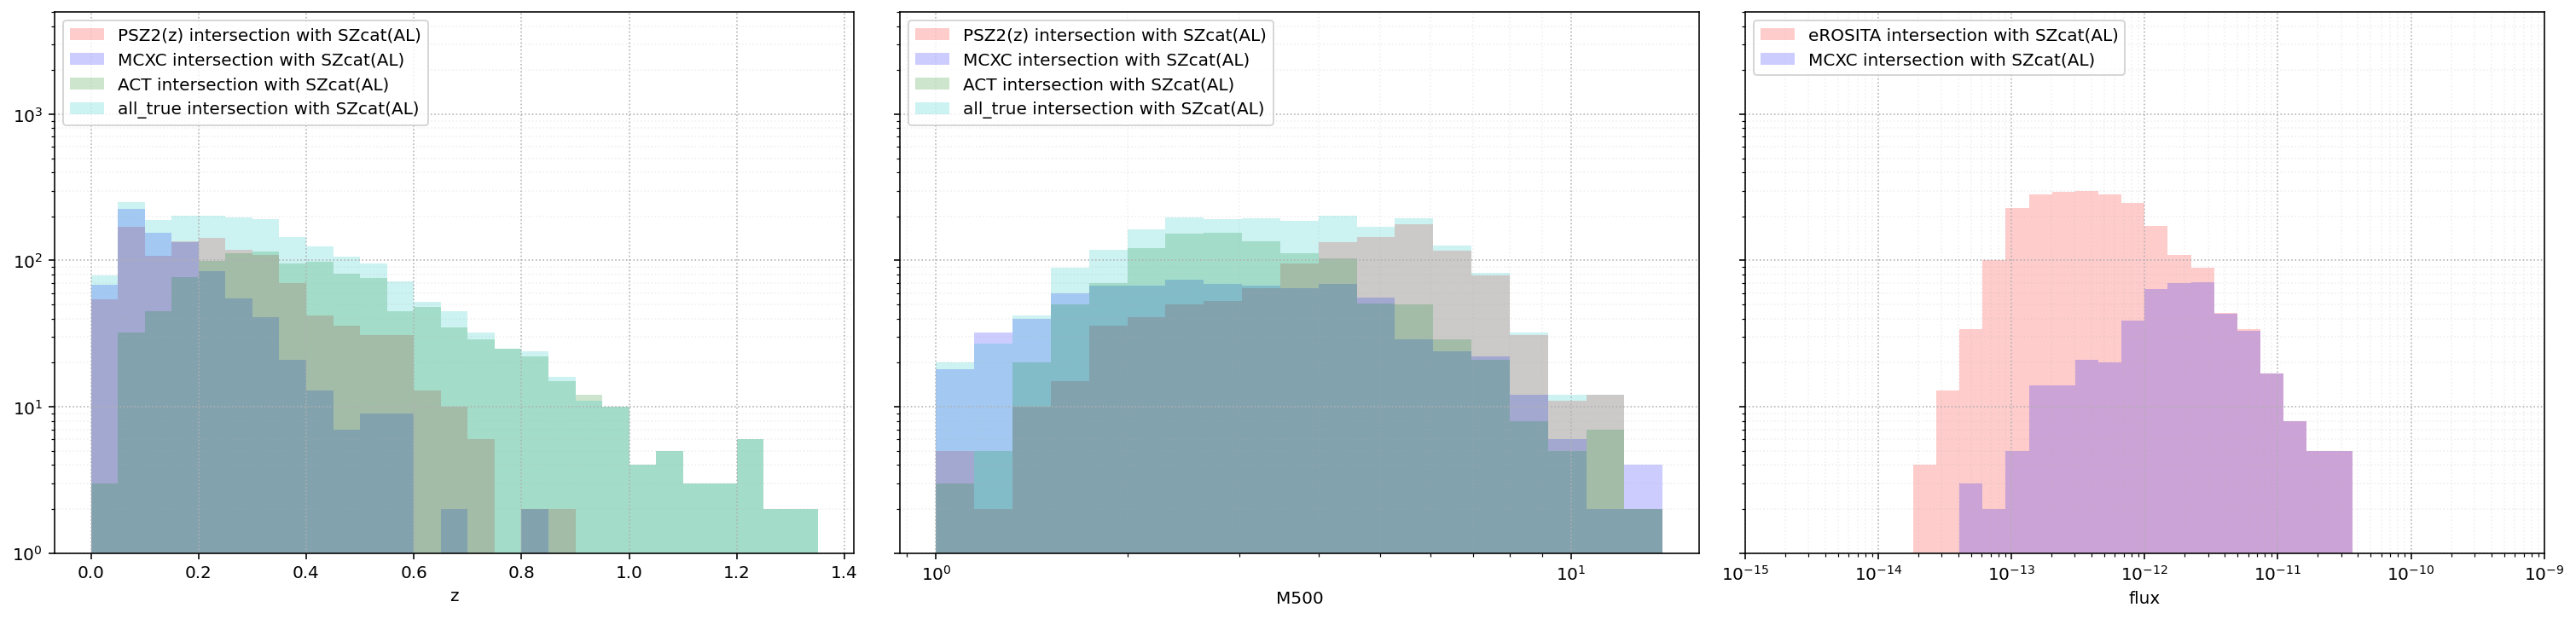

In [64]:
make_m_z_hist(df, ' intersection with SZcat(AL)')

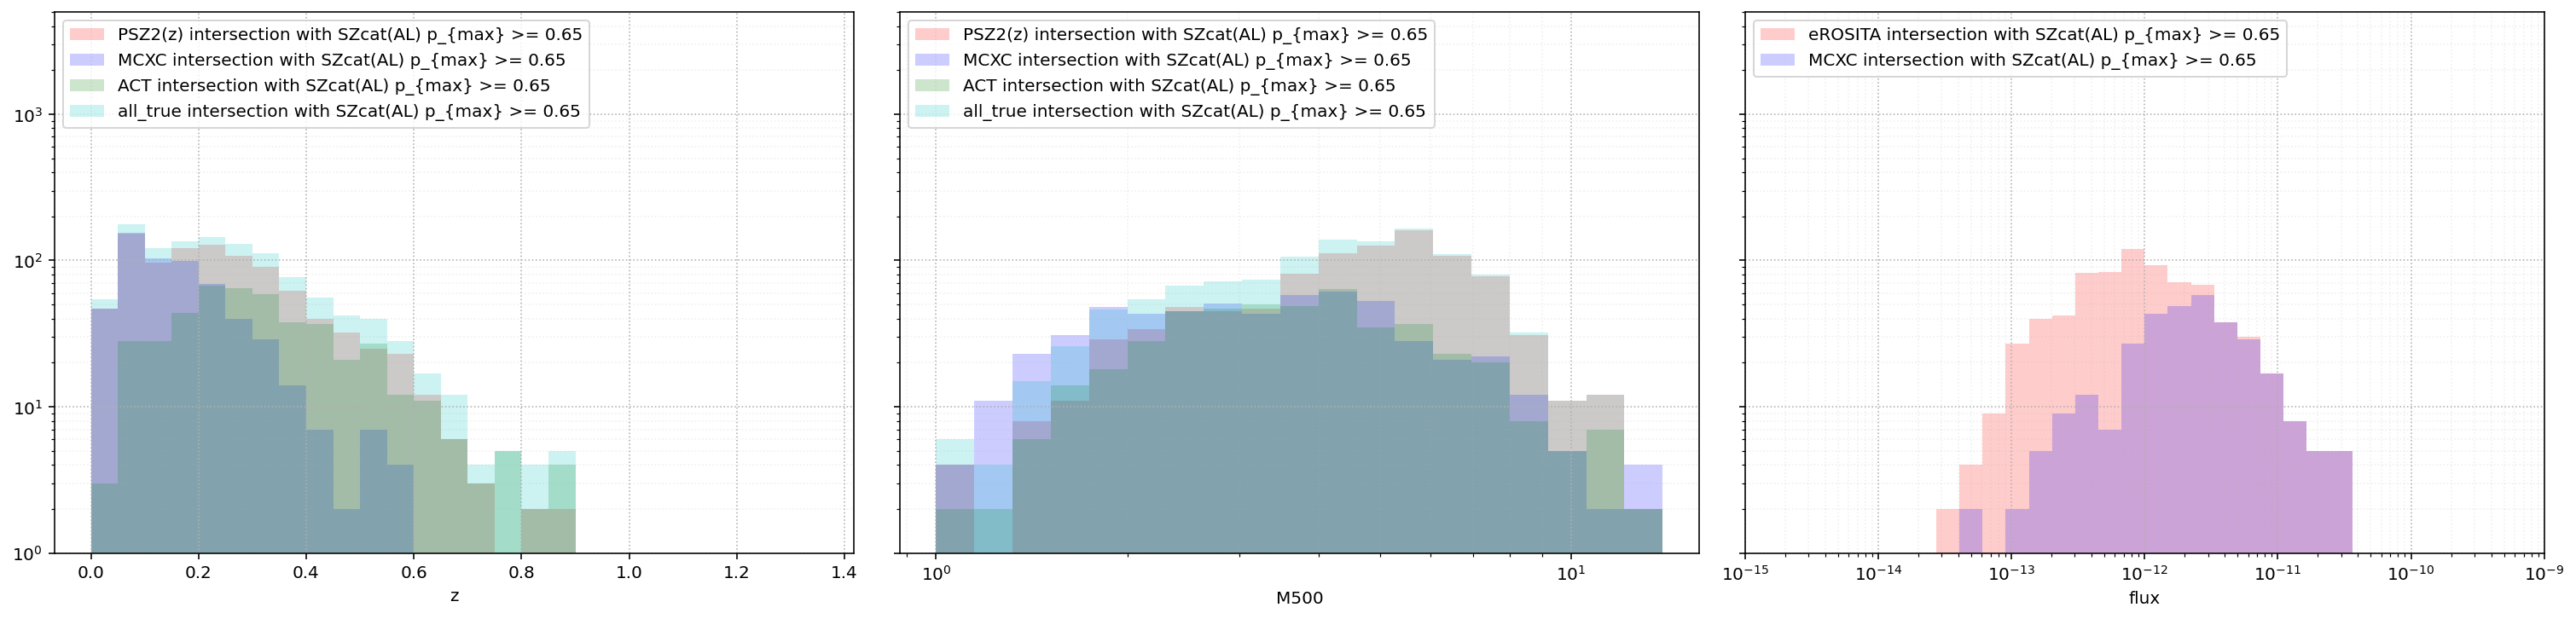

In [68]:
df = df[df['max_pred'] >= 0.65]
make_m_z_hist(df, ' intersection with SZcat(AL) p_{max} >= 0.65')

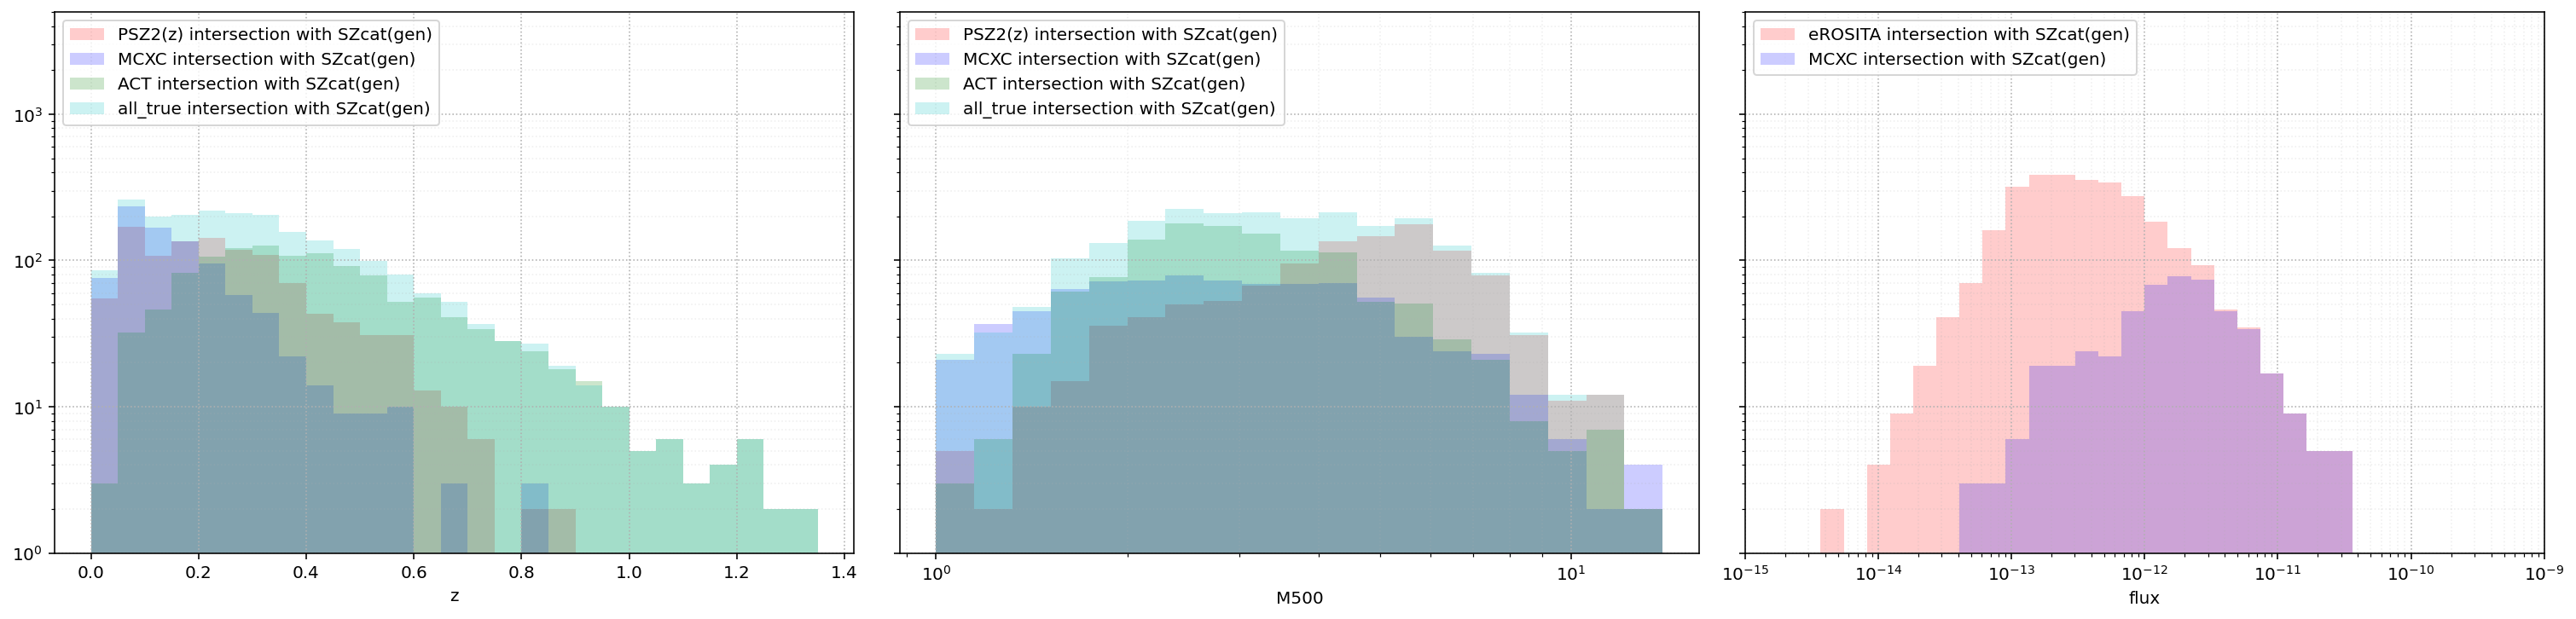

In [66]:
df = pd.read_csv('/home/rt2122/Data/gen_cats/gen_all_found_brcat_prec0.00.csv')
make_m_z_hist(df, ' intersection with SZcat(gen)')

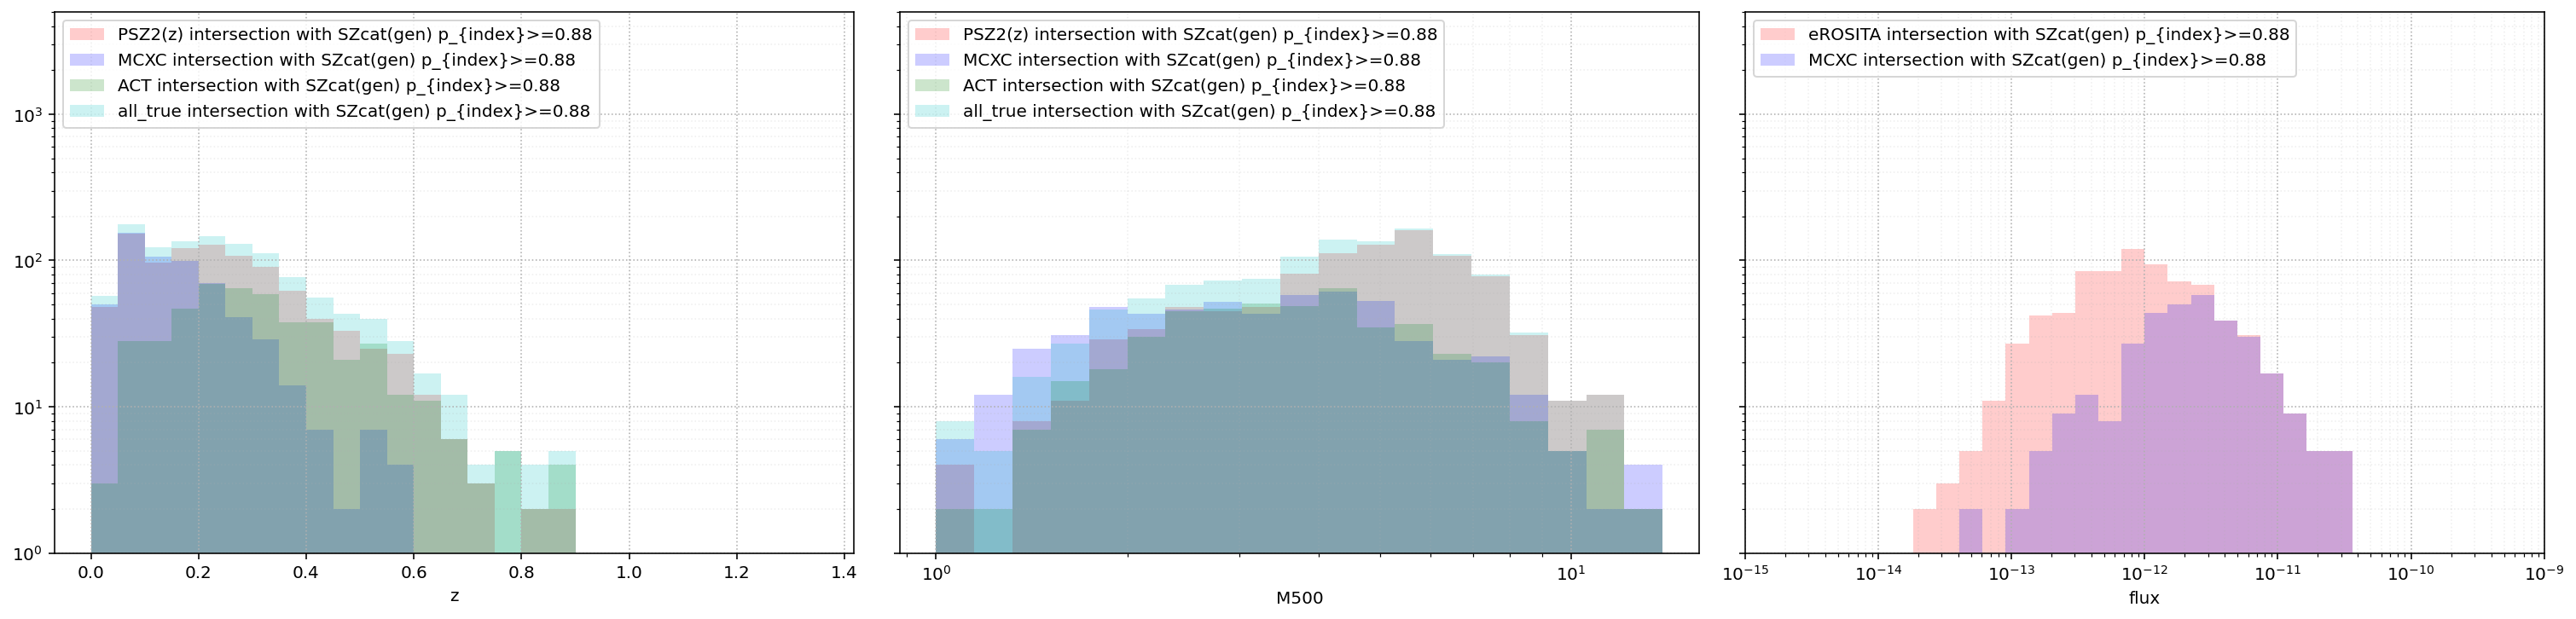

In [67]:
df = df[df['mpp'] >= 0.88]
make_m_z_hist(df, ' intersection with SZcat(gen) p_{index}>=0.88')